In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [37]:
df = pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [38]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [39]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [40]:
x = df.drop('math_score' , axis = 1)


In [41]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [42]:
print("values in gender :" , df['gender'].unique()) 
print("values in  race_ethnicity :" , df['race_ethnicity'].unique()) 
print("values in parental_level_of_education :" , df['parental_level_of_education'].unique()) 
print("values in lunch :" , df['lunch'].unique()) 
print("values in test_preparation_course :" , df['test_preparation_course'].unique()) 


values in gender : ['female' 'male']
values in  race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
values in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
values in lunch : ['standard' 'free/reduced']
values in test_preparation_course : ['none' 'completed']


In [ ]:
num_feature = x.select_dtypes(exclude = 'object').columns
cat_feature = x.select_dtypes(include= 'object').columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transform = StandardScaler()
categorical_transform = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('Onehotencoder' , categorical_transform , cat_feature),
        ('Standardscaler' , numeric_transform , num_feature)
    ]
)



In [44]:
x = preprocessor.fit_transform(x)

In [45]:
x.shape

(1000, 19)

In [46]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)


In [47]:
def evalute_model(true , predict):
    mae = mean_absolute_error(true , predict)
    mse = mean_squared_error(true , predict)
    r2 = r2_score(true , predict)
    return mae , mse , r2

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
models = {
    'Linear Regressor' : LinearRegression(),
    'ridge regressor' : Ridge(),
    'lasso regressor' : Lasso(),
    'Knearestneighbour' : KNeighborsRegressor(),
    'Decision Tree regressor' : DecisionTreeRegressor(),
    'catboost regressor' : CatBoostRegressor(verbose=False),
    'XGB regressor' : XGBRegressor(),
    'adaboost regressor' : AdaBoostRegressor(),
    'Random Forest Regressor' :RandomForestRegressor()
}



model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train , y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae , model_train_mse , model_train_r2 = evalute_model(y_train  , y_train_pred)
    model_test_mae , model_test_mse , model_test_r2 = evalute_model(y_test , y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.values())[i])

    print('Model performance for training data')
    print("mean absolute error for training data  :- {:.4f}" .format(model_train_mae))
    print("mean squared error for training data  :- {:.4f}" .format(model_train_mse))
    print("r2 score for training data  :- {:.4f}" .format(model_train_r2))

    print("-"*35)

    print('Model performance for test data')
    print("mean absolute error for test data  :- {:.4f}" .format(model_train_mae))
    print("mean squared error for test data  :- {:.4f}" .format(model_test_mse))
    print("r2 score for test data  :- {:.4f}" .format(model_test_r2))


    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')

Linear Regressor
Model performance for training data
mean absolute error for training data  :- 4.2667
mean squared error for training data  :- 28.3349
r2 score for training data  :- 0.8743
-----------------------------------
Model performance for test data
mean absolute error for test data  :- 4.2667
mean squared error for test data  :- 29.0952
r2 score for test data  :- 0.8804


ridge regressor
Model performance for training data
mean absolute error for training data  :- 4.2650
mean squared error for training data  :- 28.3378
r2 score for training data  :- 0.8743
-----------------------------------
Model performance for test data
mean absolute error for test data  :- 4.2650
mean squared error for test data  :- 29.0563
r2 score for test data  :- 0.8806


lasso regressor
Model performance for training data
mean absolute error for training data  :- 5.2063
mean squared error for training data  :- 43.4784
r2 score for training data  :- 0.8071
-----------------------------------
Model perfo

In [55]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge(),0.880593
0,LinearRegression(),0.880433
5,<catboost.core.CatBoostRegressor object at 0x0...,0.851632
8,"(DecisionTreeRegressor(max_features=1.0, rando...",0.850535
7,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.848531
6,"XGBRegressor(base_score=None, booster=None, ca...",0.827797
2,Lasso(),0.825320
3,KNeighborsRegressor(),0.784030
4,DecisionTreeRegressor(),0.742807


In [56]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted')

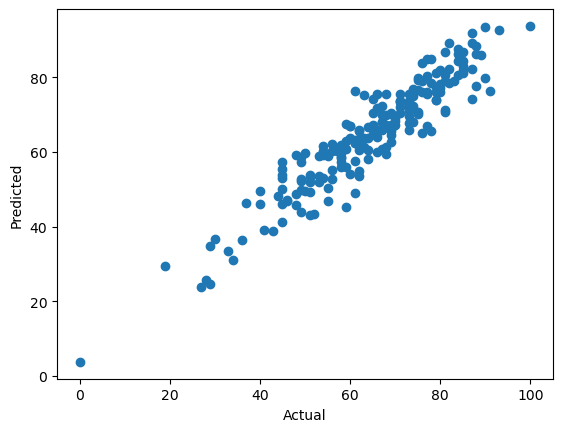

In [57]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

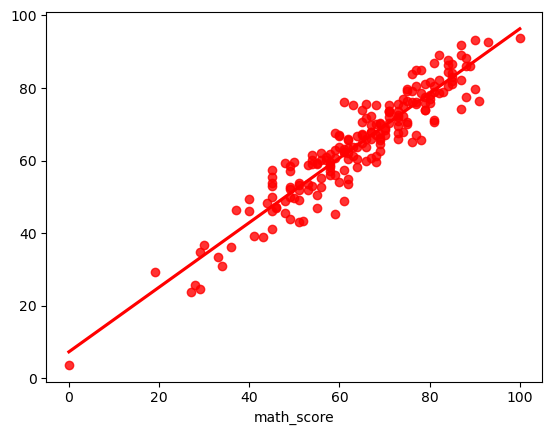

In [63]:
sns.regplot(x=y_test,y=y_pred,ci = None,color ='red')


In [64]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
